<a href="https://colab.research.google.com/github/AbhishekPatil1404/House-Price-Prediction-using-LinearRegression-Model/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Porblem statement
* you have been given a dataset that describws the houses in Boston. Now, based on the given features you have to predict the house price.

In [ ]:
df = pd.read_csv('/content/boston housing.csv', header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       505 non-null    float64
 1   1       505 non-null    float64
 2   2       505 non-null    float64
 3   3       505 non-null    int64  
 4   4       505 non-null    float64
 5   5       505 non-null    float64
 6   6       505 non-null    float64
 7   7       505 non-null    float64
 8   8       505 non-null    int64  
 9   9       505 non-null    int64  
 10  10      505 non-null    float64
 11  11      505 non-null    float64
 12  12      505 non-null    float64
 13  13      505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


# Adding columns

In [ ]:
df.columns = ("CRIM", "IN", "INDUS", "CHOS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE")

In [ ]:
df.head()

,CRIM,IN,INDUS,CHOS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


# column information


* CRIM   -  per capita crime rate by town
* ZN     -  proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS  -  proportion of non-retail business acres per town
* CHAS   -  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX    -  nitric oxides concentration (parts per 10 million)
* RM     -  average number of rooms per dwelling
* AGE    -  proportion of owner-occupied units built prior to 1940
* DIS    -  weighted distances to five Boston employment centres
* RAD    -  index of accessibility to radial highways
* TAX    -  full-value property-tax rate per $10,000
* PTRATIO - pupil-teacher ratio by town
* B       - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT  -  % lower status of the population



# Exploratory analysis

In [ ]:
df.tail()

,CRIM,IN,INDUS,CHOS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
504,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
df.shape

(505, 14)

In [ ]:
df.columns

Index(['CRIM', 'IN', 'INDUS', 'CHOS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [ ]:
df.dtypes

CRIM       float64
IN         float64
INDUS      float64
CHOS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [ ]:
df.corr

<bound method DataFrame.corr of         CRIM   IN  INDUS  CHOS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0    0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
1    0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
2    0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
3    0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   
4    0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222     18.7   
..       ...  ...    ...   ...    ...    ...   ...     ...  ...  ...      ...   
500  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
501  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
502  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
503  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
504  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0

In [ ]:
df.describe()

,CRIM,IN,INDUS,CHOS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Creating the heatmap

<Axes: >

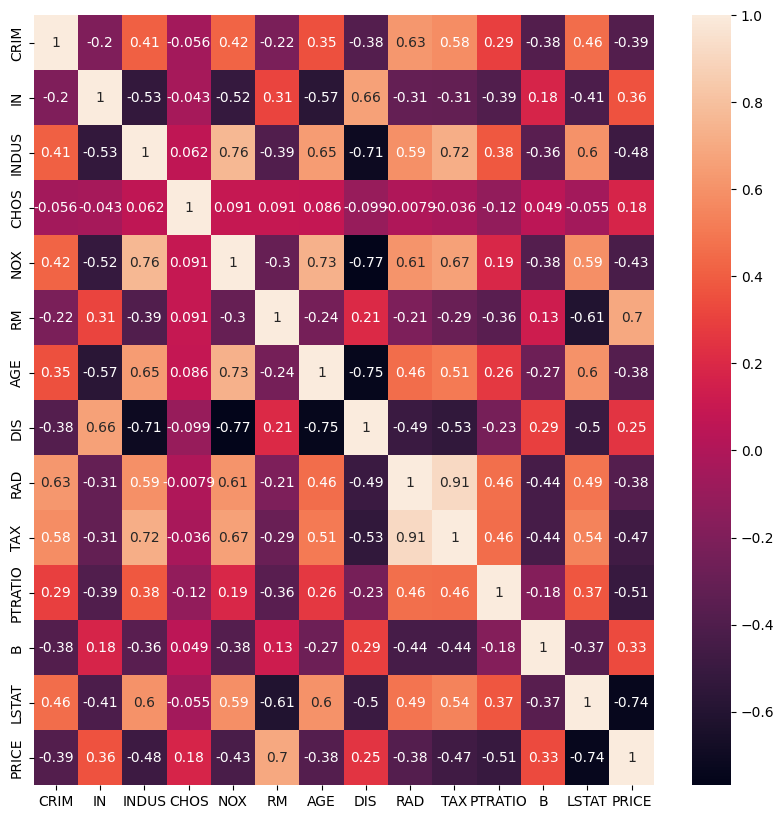

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


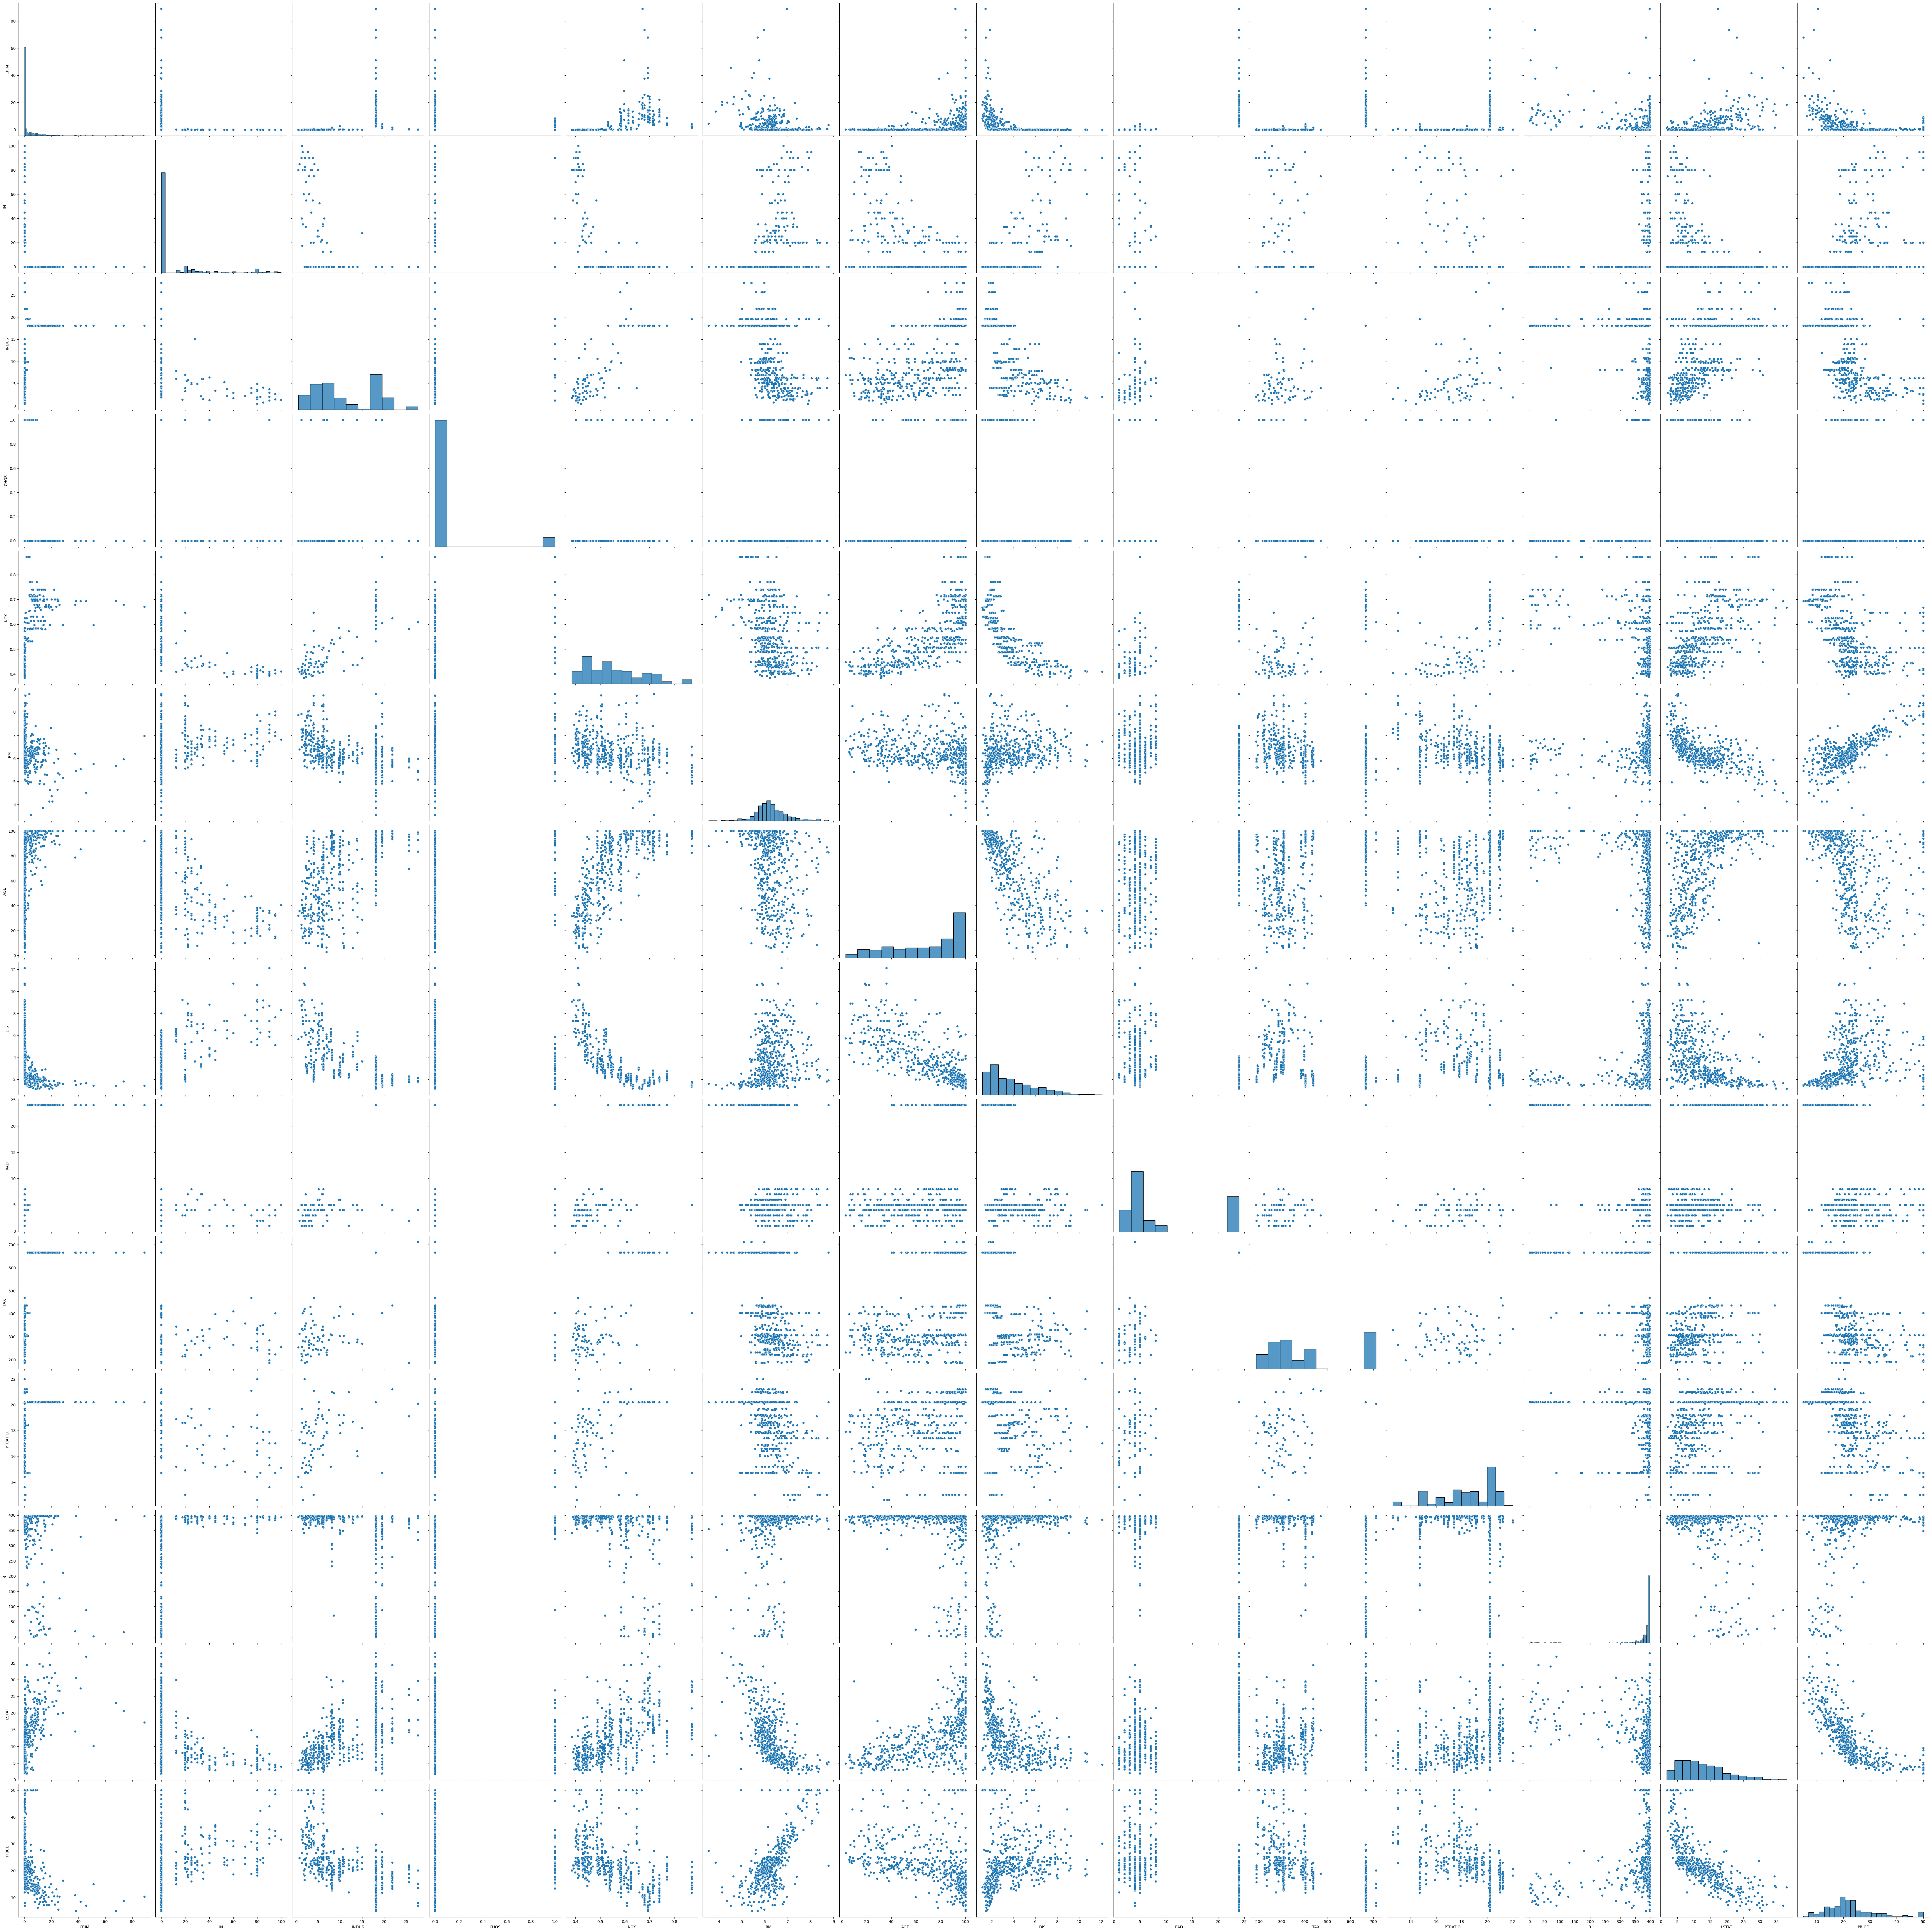

In [ ]:
sns.pairplot(df, size =5)

In [ ]:
# minimum price
df.PRICE.min()

5.0

In [ ]:
# maximum price
df.PRICE.max()

50.0

<Axes: >

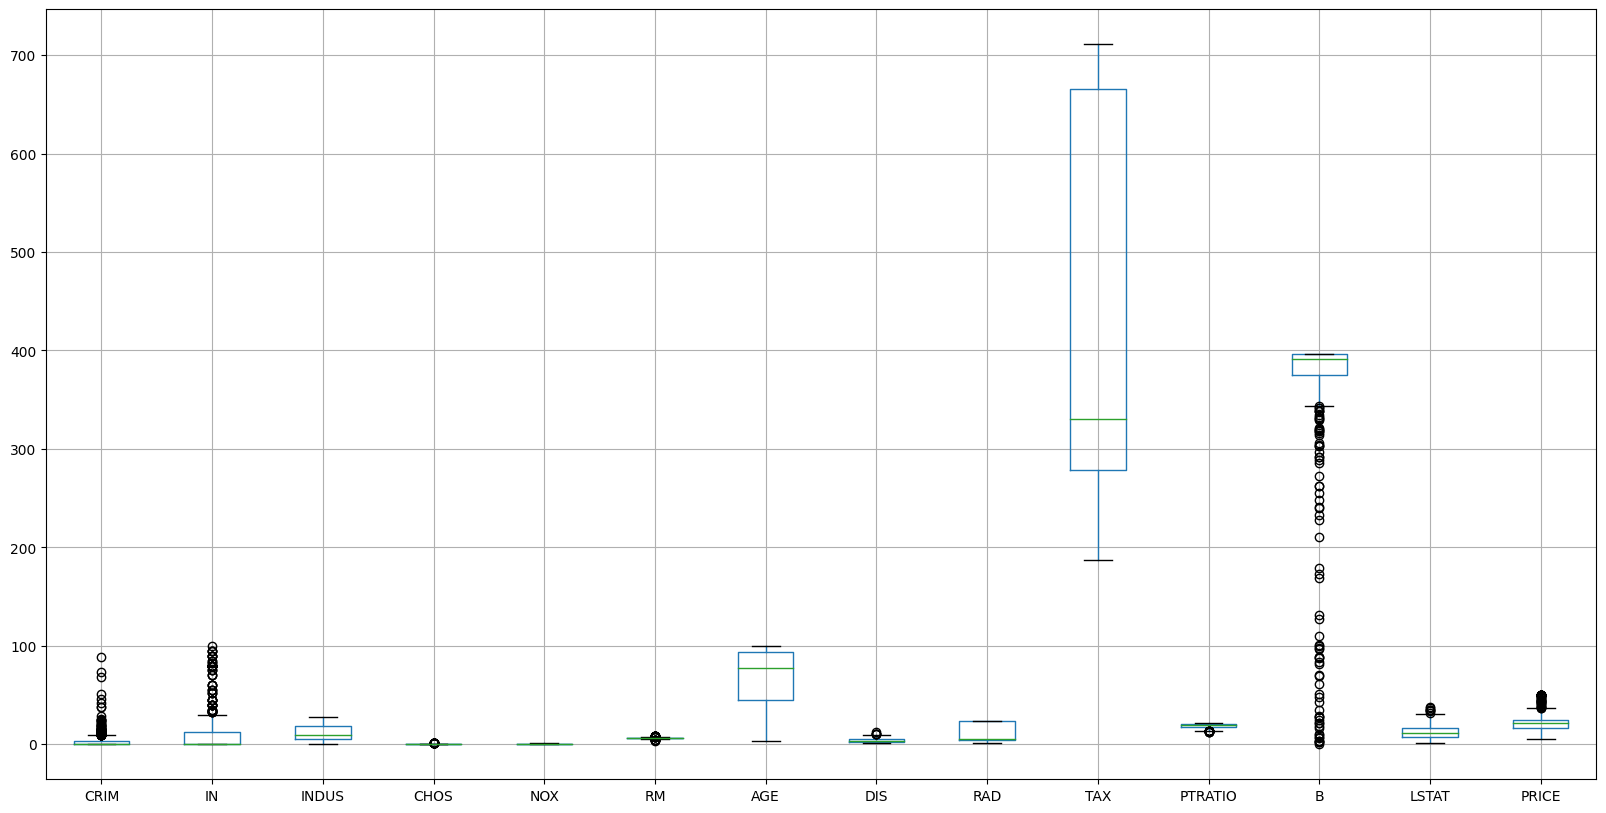

In [ ]:
#Plotting the box plot
plt.figure(figsize=(20,10))
df.boxplot()

#Machine Learning - Linear Regression

In [ ]:
X = np.array(df.drop("PRICE", axis=1))
Y = np.array(df.PRICE)

In [ ]:
X

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, ..., 1.8700e+01, 3.9463e+02,
        2.9400e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

# Spliting the data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

In [ ]:
len(Y_test)

101

# Choosing the model

In [ ]:
model = LinearRegression()

# Fitting/Train the model

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# intercept value
model.intercept_

34.56075241385133

In [ ]:
# Coefficient value
model.coef_

array([-9.86419414e-02,  3.55088661e-02,  2.01858184e-02,  2.48715542e+00,
       -1.80404571e+01,  4.08855060e+00,  8.37000947e-03, -1.46405699e+00,
        2.96233583e-01, -1.14529048e-02, -1.00176249e+00,  1.20647494e-02,
       -5.54132250e-01])

# Prediction

In [ ]:
len(Y_test)

101

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
len(Y_pred)

101

In [ ]:
len(Y_test)

101

# Testing the model performance

In [ ]:
model.score(X_test, Y_test)

0.6522201888666164

In [ ]:
# R squared
r2_score(Y_test, Y_pred)

0.6522201888666164

In [ ]:
# Adjusted R squared


In [ ]:
#MSE
mean_squared_error(Y_test, Y_pred)

19.379041116136953

In [ ]:
#MAE
mean_absolute_error(Y_test, Y_pred)

3.1867873980180987

In [ ]:
#RMSE
np.sqrt(mean_squared_error(Y_test, Y_pred))

4.402163231428039

Text(0.5, 1.0, 'Actual Price V/s Predicted Price')

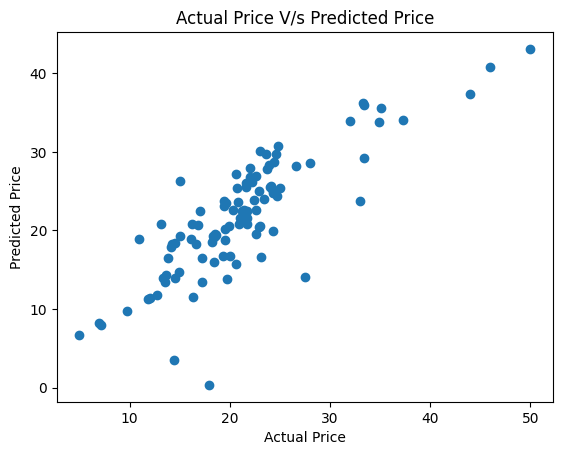

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price V/s Predicted Price")